In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA


In [48]:
iris_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                      names=['sepal_length', 'sepal width', 'petal length', 'petal width', 'class'])
x = iris_df.drop('class', axis=1)
y = iris_df['class']


In [49]:
shuffled = iris_df.sample(frac=1)
shuffled

,sepal_length,sepal width,petal length,petal width,class
1,4.9,3.0,1.4,0.2,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
84,5.4,3.0,4.5,1.5,Iris-versicolor
24,4.8,3.4,1.9,0.2,Iris-setosa
38,4.4,3.0,1.3,0.2,Iris-setosa
...,...,...,...,...,...
52,6.9,3.1,4.9,1.5,Iris-versicolor
3,4.6,3.1,1.5,0.2,Iris-setosa
86,6.7,3.1,4.7,1.5,Iris-versicolor
50,7.0,3.2,4.7,1.4,Iris-versicolor


In [50]:
X = shuffled.iloc[:, :-1].values
Y = shuffled['class'].values
X

array([[4.9, 3. , 1.4, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [5.4, 3. , 4.5, 1.5],
       [4.8, 3.4, 1.9, 0.2],
       [4.4, 3. , 1.3, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [5.2, 3.4, 1.4, 0.2],
       [6.5, 3. , 5.8, 2.2],
       [5.2, 2.7, 3.9, 1.4],
       [6.4, 2.9, 4.3, 1.3],
       [5.7, 2.5, 5. , 2. ],
       [5.6, 3. , 4.1, 1.3],
       [5.8, 2.7, 5.1, 1.9],
       [7.9, 3.8, 6.4, 2. ],
       [5.1, 3.8, 1.5, 0.3],
       [6.1, 3. , 4.9, 1.8],
       [6.3, 2.5, 4.9, 1.5],
       [6.2, 2.9, 4.3, 1.3],
       [7.2, 3.2, 6. , 1.8],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [6.9, 3.1, 5.1, 2.3],
       [4.7, 3.2, 1.3, 0.2],
       [6.3, 2.8, 5.1, 1.5],
       [5.4, 3.4, 1.7, 0.2],
       [5.6, 2.8, 4.9, 2. ],
       [5.7, 4.4, 1.5, 0.4],
       [6.2, 3.4, 5.4, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [6. , 3.4, 4.5, 1.6],
       [5.8, 2.8, 5.1, 2.4],
       [6.5, 3. , 5.5, 1.8],
       [4.8, 3. , 1.4, 0.3],
       [5.1, 3.3, 1.7, 0.5],
       [7.3, 2

In [51]:
Y

array(['Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virgini

In [52]:
shuffled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 140
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [53]:
shuffled.describe()

,sepal_length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [54]:
shuffled['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [55]:
shuffled.duplicated()

1      False
13     False
84     False
24     False
38     False
       ...  
52     False
3      False
86     False
50     False
140    False
Length: 150, dtype: bool

In [56]:
shuffled.duplicated().sum()

3

In [57]:
shuffled = shuffled.drop_duplicates()
shuffled

,sepal_length,sepal width,petal length,petal width,class
1,4.9,3.0,1.4,0.2,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
84,5.4,3.0,4.5,1.5,Iris-versicolor
24,4.8,3.4,1.9,0.2,Iris-setosa
38,4.4,3.0,1.3,0.2,Iris-setosa
...,...,...,...,...,...
52,6.9,3.1,4.9,1.5,Iris-versicolor
3,4.6,3.1,1.5,0.2,Iris-setosa
86,6.7,3.1,4.7,1.5,Iris-versicolor
50,7.0,3.2,4.7,1.4,Iris-versicolor


<Axes: xlabel='class', ylabel='count'>

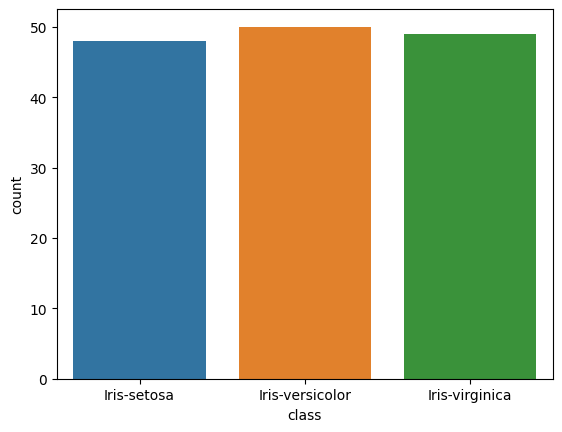

In [58]:
sns.countplot(x='class', data=shuffled)

<ipython-input-59-a0dbdb91ea87>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(shuffled.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='plasma')


<Axes: >

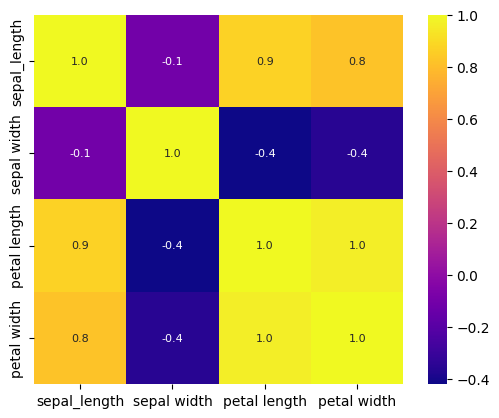

In [59]:
sns.heatmap(shuffled.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='plasma')

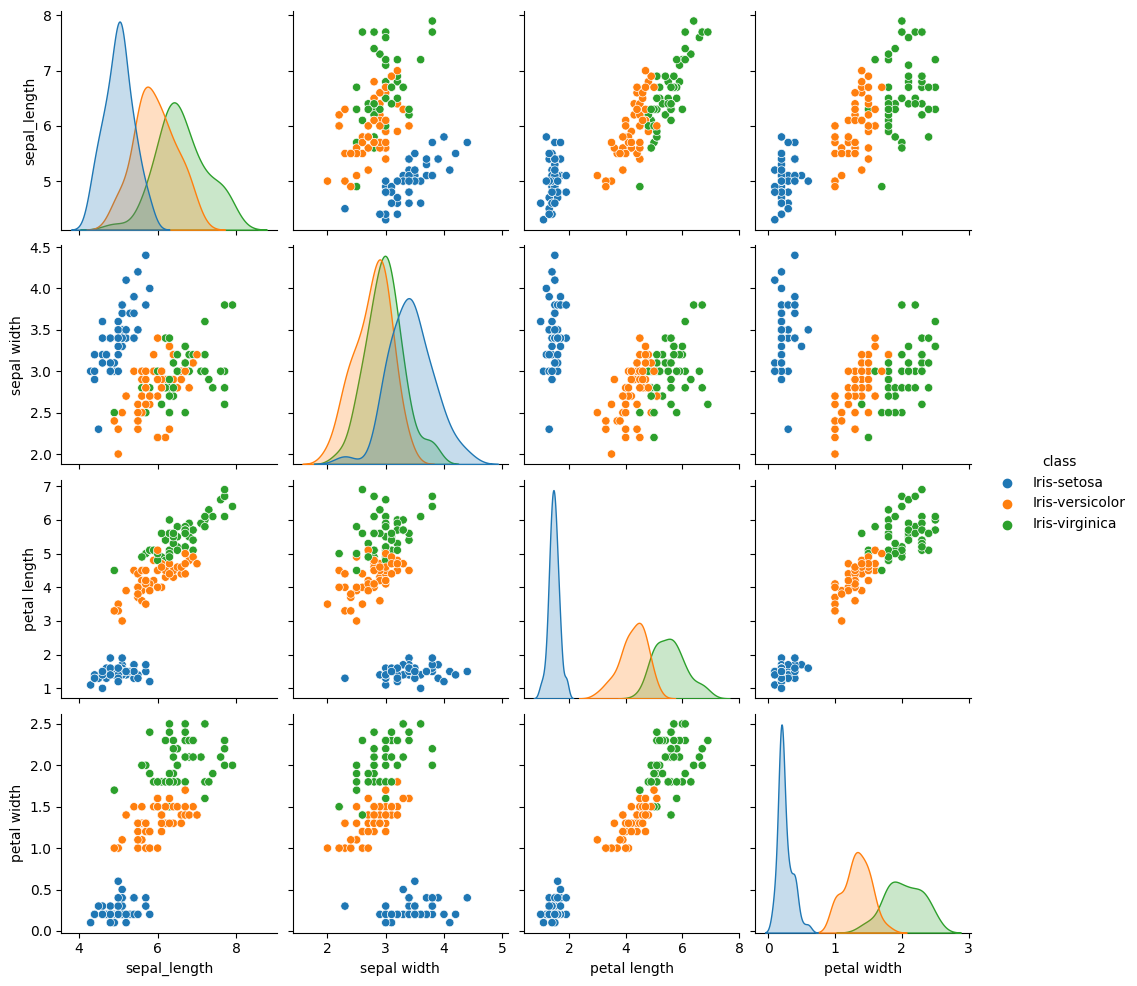

In [60]:
shuffled['class'].value_counts()
sns.pairplot(shuffled, hue='class')
plt.show()

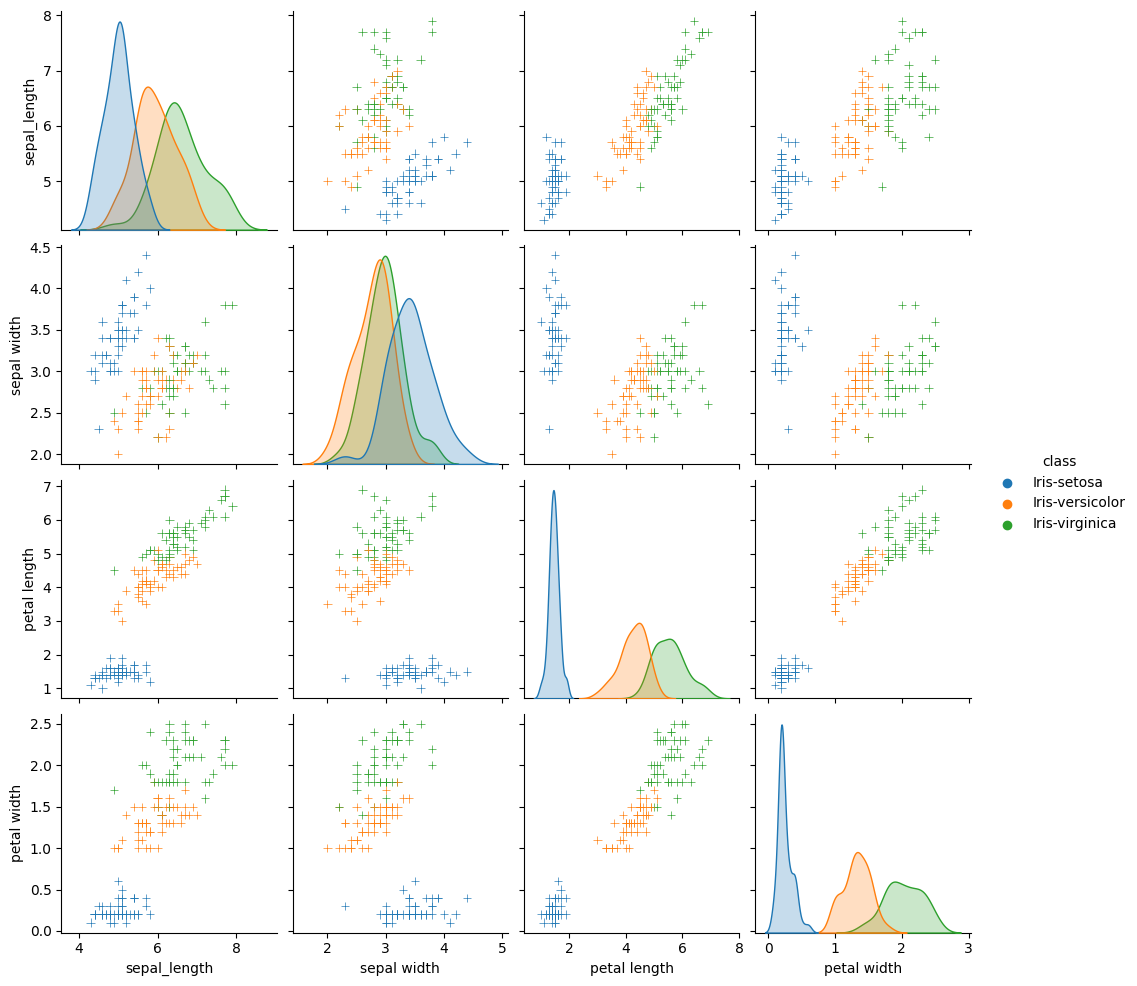

In [61]:
g = sns.pairplot(shuffled, hue='class', markers='+')
plt.show()

In [62]:
shuffled.columns

Index(['sepal_length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

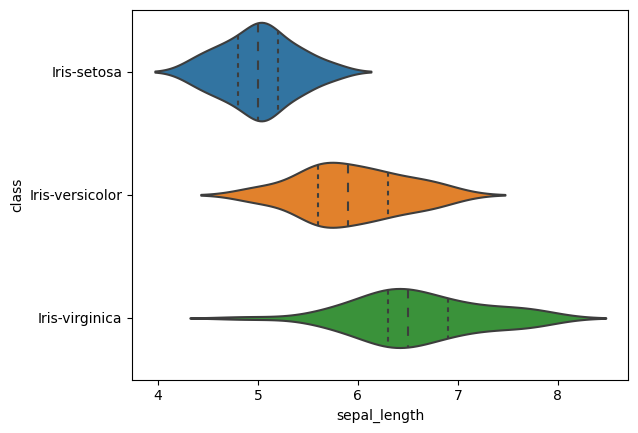

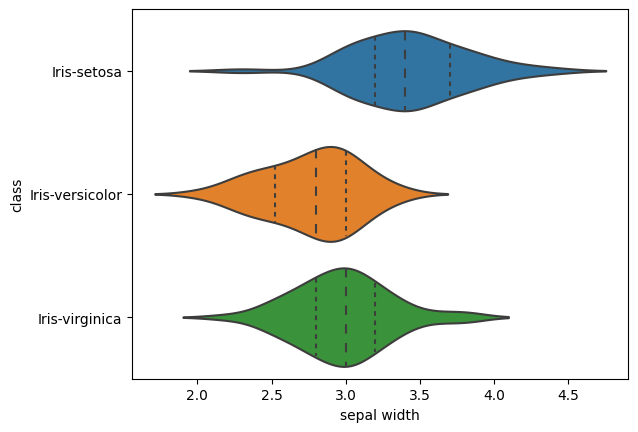

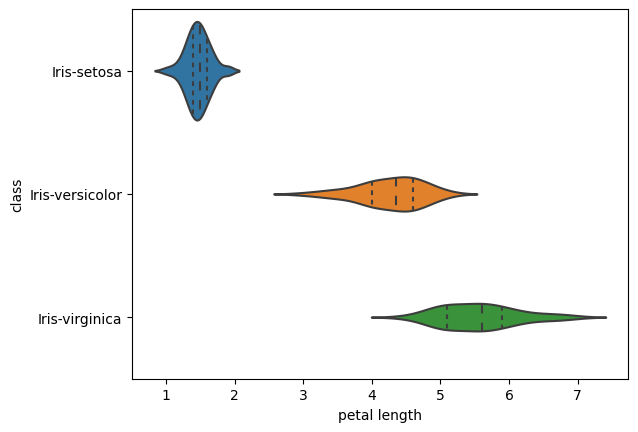

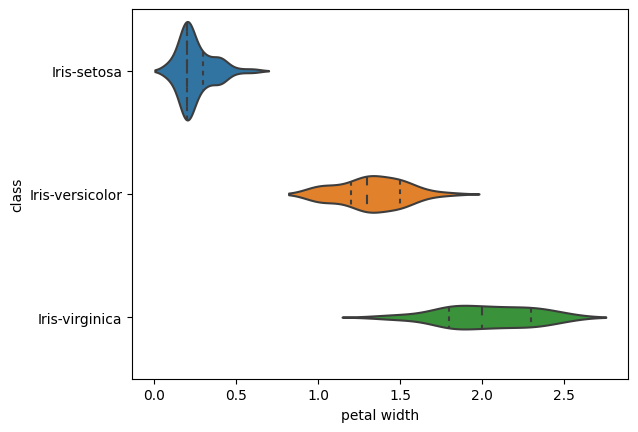

In [63]:
g = sns.violinplot(y='class', x='sepal_length', data=shuffled, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='sepal width', data=shuffled, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='petal length', data=shuffled, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='petal width', data=shuffled, inner='quartile')
plt.show()

In [64]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [65]:
# Preprocess the data using PCA
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca

array([[-2.25774288,  0.25611631],
       [ 1.11025421, -0.09846316],
       [-2.08176755, -1.57344212],
       [ 0.16146451,  0.17022837],
       [ 0.83224988, -0.44868289],
       [-2.19634925,  0.51224423],
       [ 1.27965981,  0.80442083],
       [ 1.47036606, -1.06649688],
       [-2.3289385 ,  0.81409312],
       [-1.96886361,  0.63701727],
       [ 3.38488749,  0.03298848],
       [-2.10937468, -1.07902228],
       [ 0.4810191 ,  1.73159079],
       [ 1.31113033,  0.9357774 ],
       [ 1.33486805,  1.12941828],
       [ 1.33196531,  1.70964741],
       [ 1.94323121, -0.68354781],
       [-2.65650226, -0.56722179],
       [-1.85117676, -0.56474565],
       [-2.04606853, -1.12035425],
       [-2.03706775,  0.42848304],
       [-2.17172758, -0.52950169],
       [ 1.60984856, -0.28838425],
       [-1.97973855,  0.60633604],
       [ 0.3434935 ,  0.56287732],
       [ 1.97195566, -0.42632264],
       [ 1.2952317 ,  1.63246975],
       [-2.3329216 , -0.14828063],
       [ 0.96671469,

In [66]:
X_test_pca

array([[ 0.84508171, -0.80860249],
       [ 2.04726009, -0.99916549],
       [ 1.43682636, -0.44603304],
       [ 0.44252962,  1.49751247],
       [-2.27260091, -0.73693867],
       [ 1.55949393, -0.27037454],
       [-0.36598238,  1.49521174],
       [-2.1172258 ,  0.65831874],
       [ 1.52491222,  0.02818259],
       [ 0.41867221,  0.96727425],
       [ 1.95228238, -0.5416886 ],
       [ 1.23793946,  0.66365887],
       [ 2.88608834, -0.82619532],
       [ 0.79261352,  0.05436859],
       [-2.12120889, -0.30405501],
       [-0.28673924,  1.97788359],
       [ 0.75308946,  0.19620048],
       [ 1.68311475,  0.41347257],
       [-2.08762481, -1.01765981],
       [ 2.13023953, -0.92513149],
       [ 0.53046346, -0.89940254],
       [ 1.94430416,  0.16123815],
       [-2.12331781, -2.78458481],
       [-1.9293779 , -0.72551079],
       [ 1.41495077,  0.46984428],
       [ 1.33479875, -0.61415714],
       [-2.01630949, -1.23903929],
       [ 2.09262799, -1.08075948],
       [ 1.25961401,

In [67]:
from sklearn.metrics import confusion_matrix,mean_squared_error,precision_score,recall_score,f1_score ,classification_report
# Train and evaluate multiple models
# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train_pca, y_train)
y_pred_dt = dt.predict(X_test_pca)
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("confusion_matrix_dt \n")
confusion_matrix_dt



confusion_matrix_dt 



array([[ 7,  0,  0],
       [ 0,  8,  0],
       [ 0,  2, 13]])

In [68]:
# Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train_pca, y_train)
y_pred_nb = nb.predict(X_test_pca)
confusion_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("confusion_matrix_nb\n ", confusion_matrix_nb)



confusion_matrix_nb
  [[ 7  0  0]
 [ 0  7  1]
 [ 0  3 12]]


In [69]:
# K-Nearest Neighbors (KNN) Classifier
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)
y_pred_knn = knn.predict(X_test_pca)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("confusion_matrix_knn\n ", confusion_matrix_knn)



confusion_matrix_knn
  [[ 7  0  0]
 [ 0  8  0]
 [ 0  3 12]]


In [70]:

svm = SVC()
svm.fit(X_train_pca, y_train)
y_pred_svm = svm.predict(X_test_pca)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("confusion_matrix_svm \n", confusion_matrix_svm)




confusion_matrix_svm 
 [[ 7  0  0]
 [ 0  7  1]
 [ 0  3 12]]


In [71]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train_pca, y_train)
y_pred_rf = rf.predict(X_test_pca)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("confusion_matrix_rf \n", confusion_matrix_rf)




confusion_matrix_rf 
 [[ 7  0  0]
 [ 0  8  0]
 [ 0  2 13]]


In [72]:
# Calculate train and test accuracies
dt_train_acc = accuracy_score(y_train, dt.predict(X_train_pca))
dt_test_acc = accuracy_score(y_test, y_pred_dt)
nb_train_acc = accuracy_score(y_train, nb.predict(X_train_pca))
nb_test_acc = accuracy_score(y_test, y_pred_nb)
knn_train_acc = accuracy_score(y_train, knn.predict(X_train_pca))
knn_test_acc = accuracy_score(y_test, y_pred_knn)
svm_train_acc = accuracy_score(y_train, svm.predict(X_train_pca))
svm_test_acc = accuracy_score(y_test, y_pred_svm)
rf_train_acc = accuracy_score(y_train, rf.predict(X_train_pca))
rf_test_acc = accuracy_score(y_test, y_pred_rf)



In [73]:
# Create a dictionary of accuracies
accuracies = {'Model': ['Decision Tree', 'Naive Bayes', 'KNN', 'SVM', 'Random Forest'],
              'Train Accuracy': [dt_train_acc, nb_train_acc, knn_train_acc, svm_train_acc, rf_train_acc],
              'Test Accuracy': [dt_test_acc, nb_test_acc, knn_test_acc, svm_test_acc, rf_test_acc]}

# Convert the dictionary to a dataframe
df_accuracies = pd.DataFrame(accuracies)

# Print the dataframe
df_accuracies


,Model,Train Accuracy,Test Accuracy
0,Decision Tree,1.000000,0.933333
1,Naive Bayes,0.891667,0.866667
2,KNN,0.941667,0.900000
3,SVM,0.908333,0.866667
4,Random Forest,1.000000,0.933333


In [74]:
# Generate new data points for testing
X_new = np.array([[5.1, 3.5, 1.4, 0.2], [6.2, 2.8, 4.8, 1.8], [7.3, 3.0, 6.1, 2.2]])

# Preprocess the new data using PCA and StandardScaler
X_new_scaled = scaler.transform(X_new)
X_new_pca = pca.transform(X_new_scaled)

# Assign the new data points to clusters using the pre-trained K-Means model
test_dt = dt.predict(X_new_pca)
test_nb = nb.predict(X_new_pca)
test_knn = knn.predict(X_new_pca)
test_rf = rf.predict(X_new_pca)
test_svm = svm.predict(X_new_pca)

Predictions = {'Model': ['Decision Tree', 'Naive Bayes', 'KNN', 'SVM', 'Random Forest'],
              'Predicted Class': [test_dt, test_nb, test_knn, test_svm, test_rf]}

df_Predictions = pd.DataFrame(Predictions)

# Print the dataframe
df_Predictions

,Model,Predicted Class
0,Decision Tree,"[Iris-setosa, Iris-virginica, Iris-virginica]"
1,Naive Bayes,"[Iris-setosa, Iris-versicolor, Iris-virginica]"
2,KNN,"[Iris-setosa, Iris-versicolor, Iris-virginica]"
3,SVM,"[Iris-setosa, Iris-versicolor, Iris-virginica]"
4,Random Forest,"[Iris-setosa, Iris-virginica, Iris-virginica]"
